## Agrupamento tipos de vinhos com K-Means

Nesse tutorial aplicamos o algoritmo K-Means para a tarefa de agrupamento de tipos de vinhos no conjunto de dados [Wine](https://archive.ics.uci.edu/dataset/109/wine). Esta é uma coleção que normalmente é usada para tarefas de classificação. Ele contém informações sobre vinhos, como teor alcoólico, acidez, e índices relacionados. Geralmente, inclui três classes de vinhos diferentes, rotuladas como 1, 2 e 3, representando diferentes origens ou tipos de vinhos. Como essa é uma tarefa de agrupamento (clustering), não usaremos os rótulos do banco de dados. 


In [1]:
from sklearn.datasets import load_wine

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

### Carregar os dados 

O dataframe contém 178 entradas (linhas/amostras) com 13 colunas (features/recursos/atributos).

In [2]:
# Carregar o dataset
wine_data = load_wine()

# Criar o DataFrame
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# Mostrar as dimensões e as 5 primeiras linhas do df
print(wine_df.shape)
wine_df.head()


(178, 13)


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

### Análise dos dados

Vamos fazer uma rápida análise estatística e visual dos dados.

In [3]:
# Informações da base de dados
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Todas as entradas do banco de dados são numéricas do tipo float e não há dados ausentes.

In [4]:
# Checa se há dados ausentes
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [5]:
# Descrição estatística 
wine_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

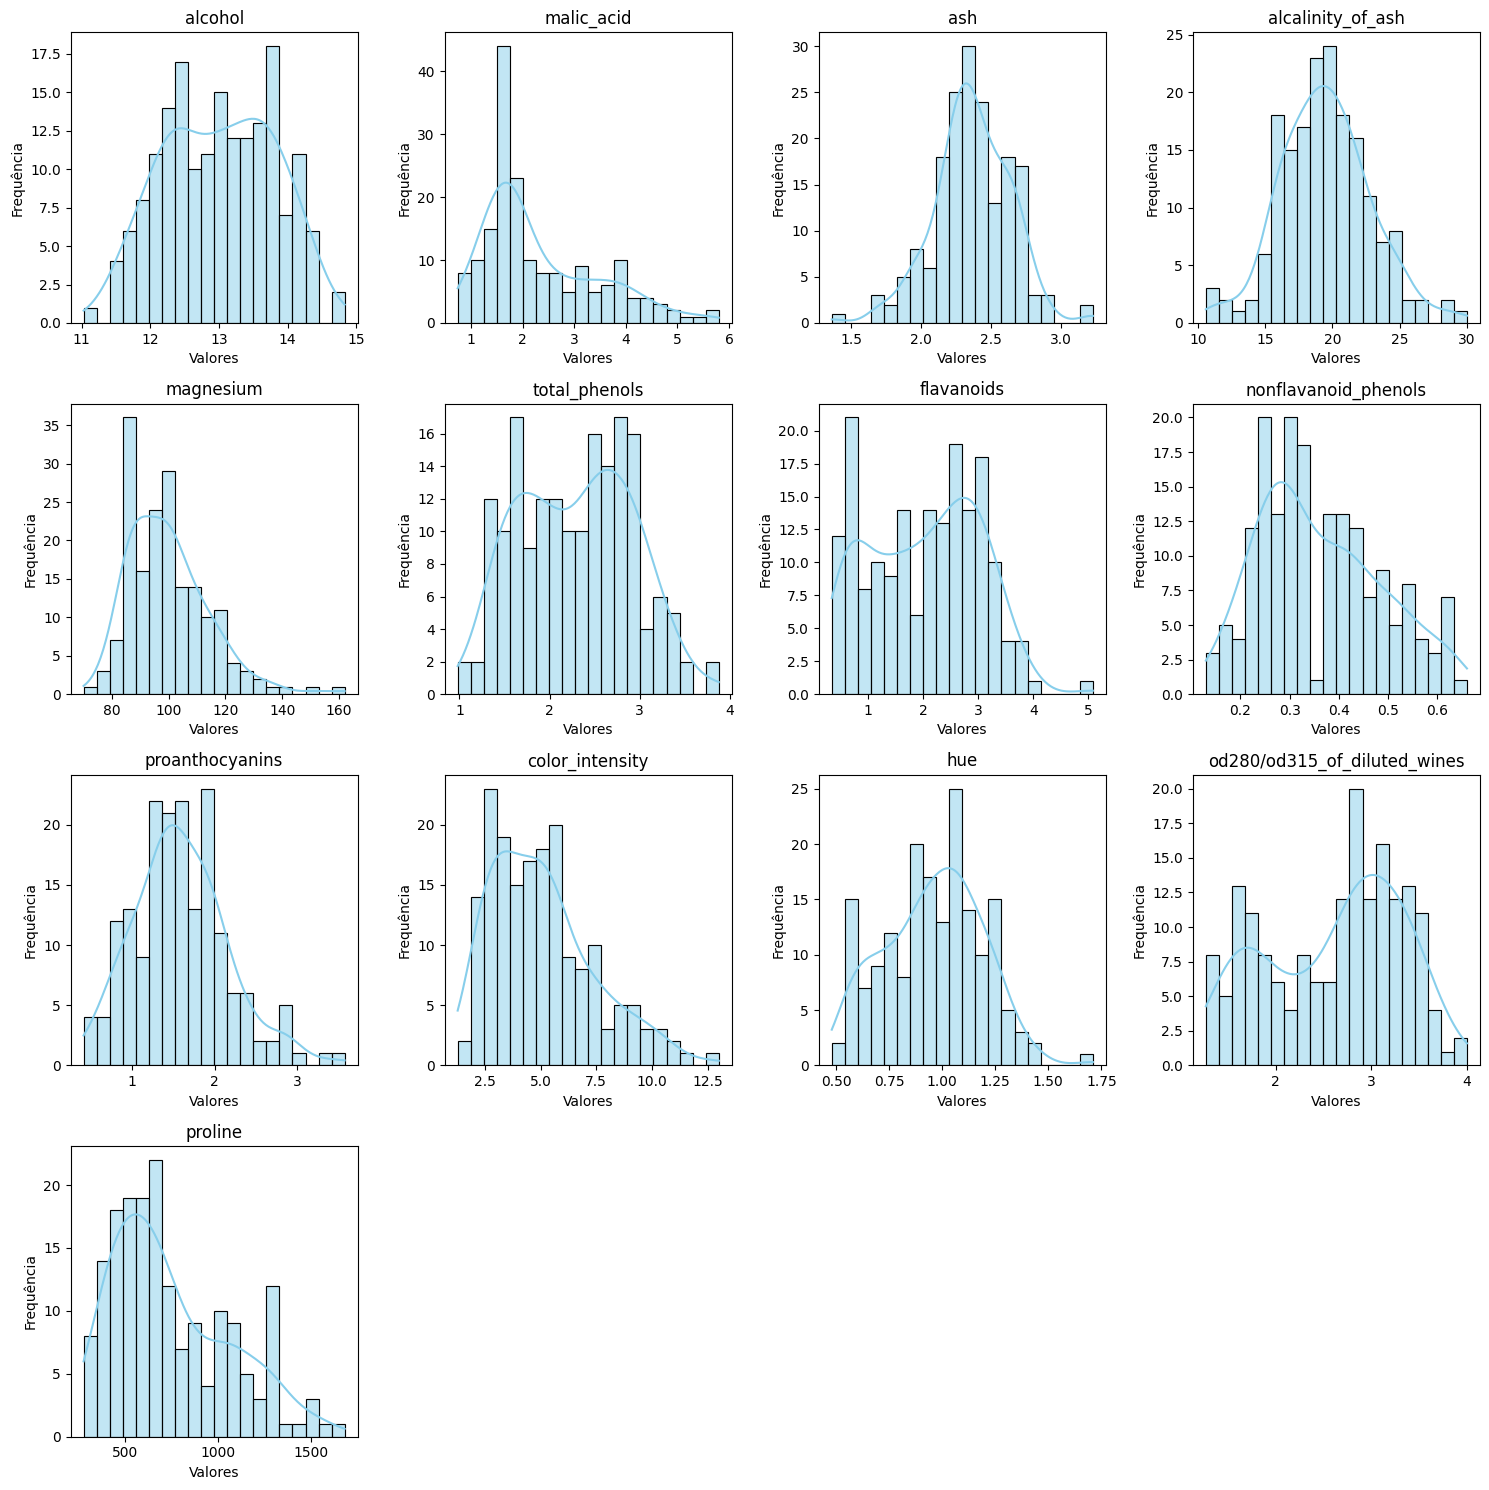

In [6]:
# Configurar subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Achatar os eixos para iteração fácil
axes = axes.flatten()

# Plotar histograma e distribuição de densidade para cada coluna
for i, col in enumerate(wine_df.columns):
    ax = axes[i]
    sns.histplot(data=wine_df, x=col, bins=20, kde=True, color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frequência')

# Ocultar subplots vazios
for i in range(len(wine_df.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


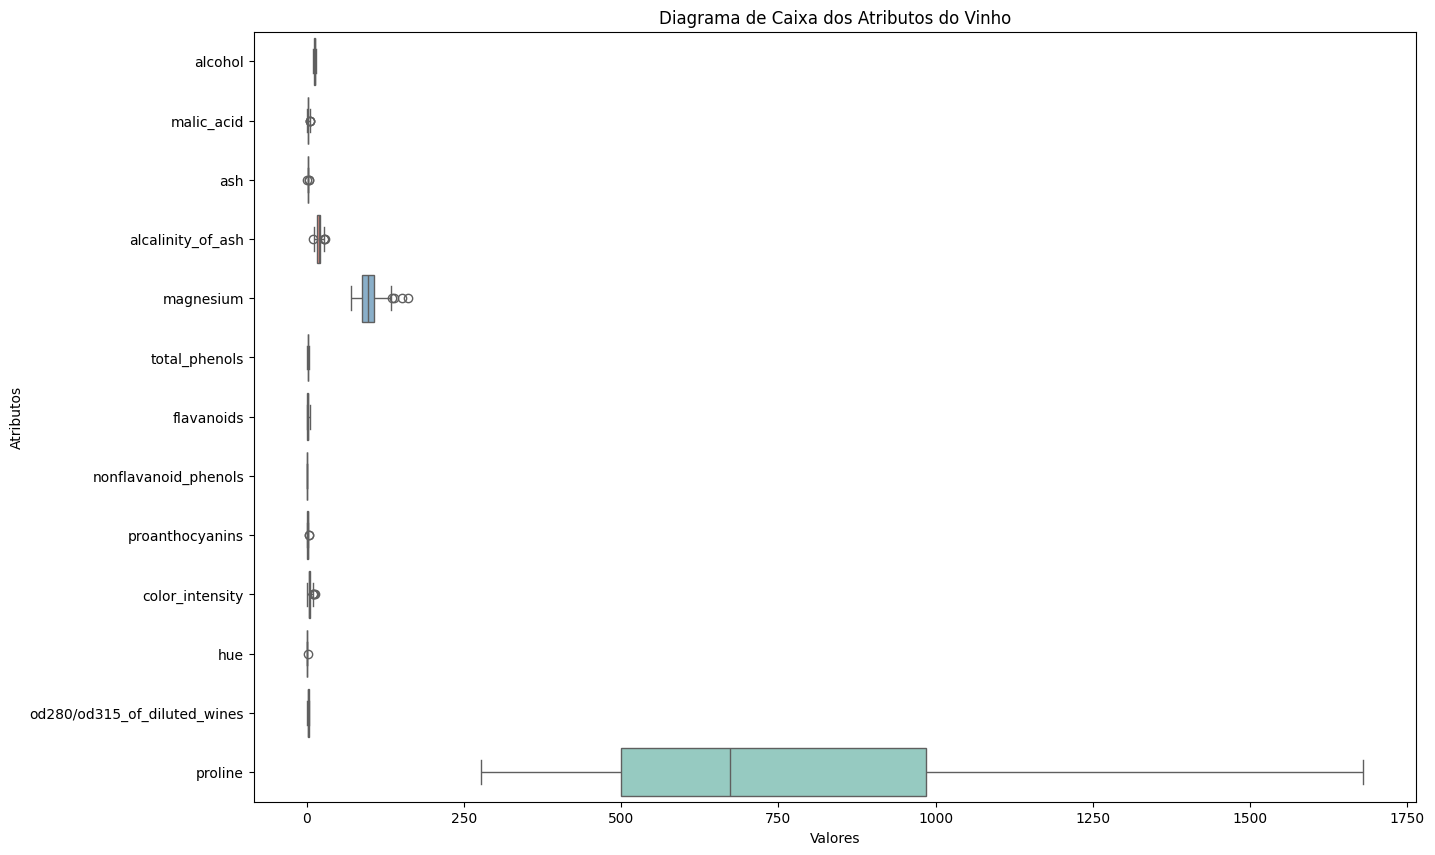

In [7]:
# Definir tamanho da figura
plt.figure(figsize=(15, 10))

# Criar box plot
sns.boxplot(data=wine_df, orient='h', palette='Set3')
plt.title('Diagrama de Caixa dos Atributos do Vinho')
plt.xlabel('Valores')
plt.ylabel('Atributos')

plt.show()


Vemos que os valores de magnésio e prolina, esta última principalmente, distorcem o gráfico e prejudicam a visualização devido aos seus valores mais elevados em relação aos outros dados.

Vamos então excluir esses dados para melhorar a visualização das demais variáveis.  


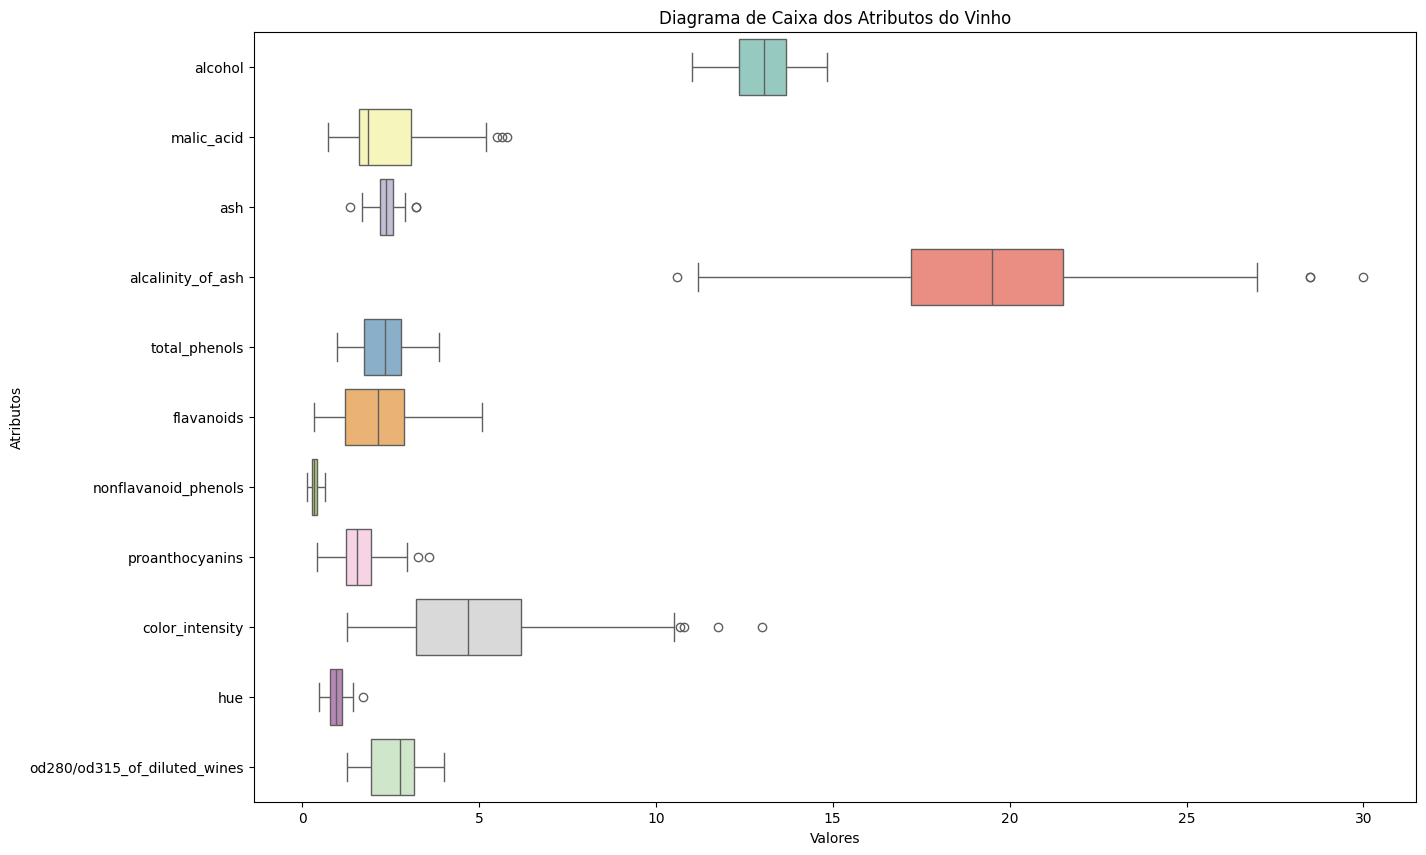

In [8]:
# Definir tamanho da figura
plt.figure(figsize=(15, 10))

# Colunas a serem excluídas
cols_delete = ['magnesium', 'proline']

# Colunas a serem incluídas
cols = [col for col in wine_df.columns if col not in cols_delete]
# Criar box plot
sns.boxplot(data=wine_df[cols], orient='h', palette='Set3')
plt.title('Diagrama de Caixa dos Atributos do Vinho')
plt.xlabel('Valores')
plt.ylabel('Atributos')

plt.show()


Vamos medir a correlação entre os atributos usando a função .corr() para criar uma matriz de correlação.

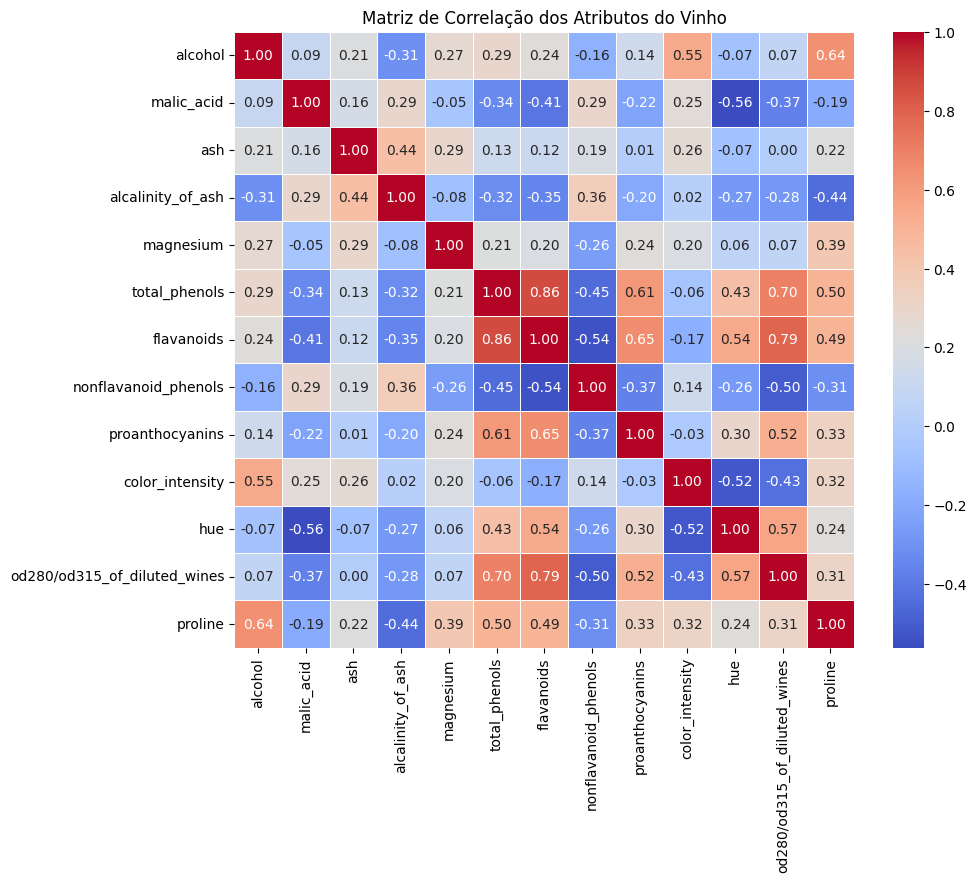

In [9]:
# Calcular a matriz de correlação
corr = wine_df.corr()

# Configurar a figura do matplotlib
plt.figure(figsize=(10, 8))

# Desenhar o mapa de calor com a máscara e a proporção de aspecto correta
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação dos Atributos do Vinho')
plt.show()


Existem diversas correlações interessantes, tanto positivas quanto negativas, entre as variáveis. Por exemplo, há uma forte correlação linear entre total_Phenols e flavonóides (0.86) e flavonóides e od280/od315_of_diluted_wines (0.79).
 
Podemos modelar a relação entre essas duas variáveis ajustando uma equação linear.

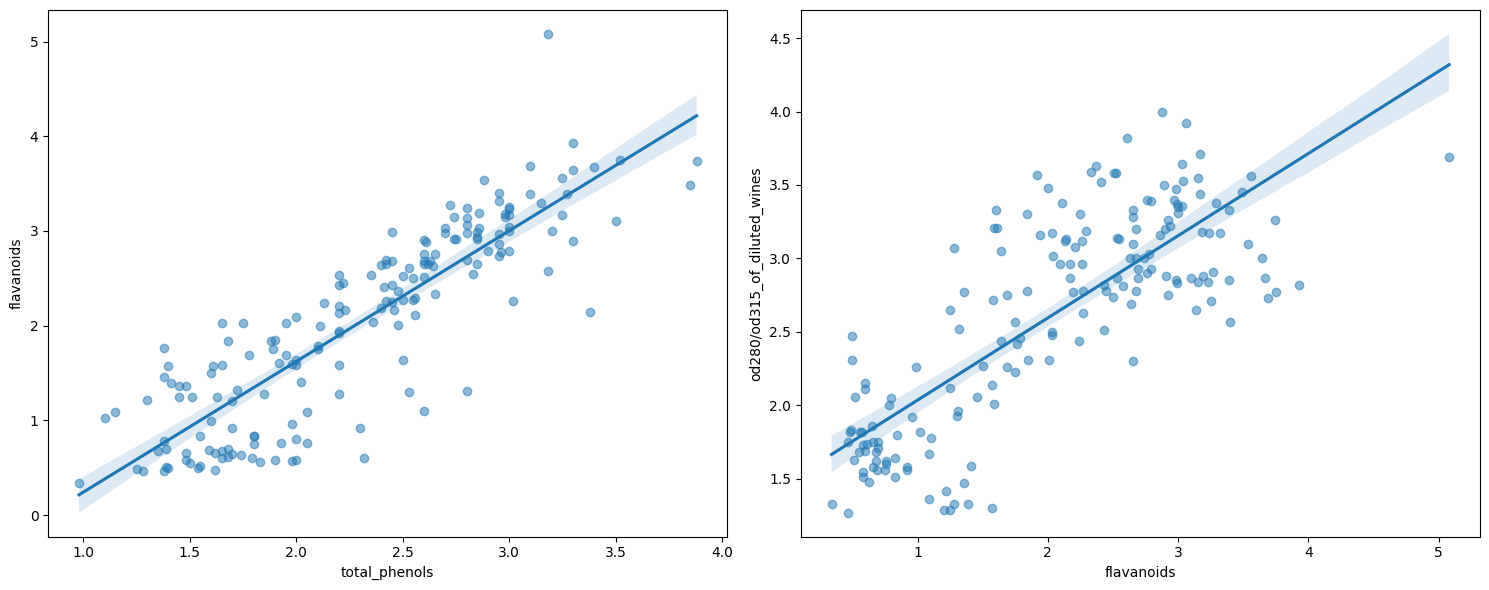

In [10]:
# Criar gráfico de dispersão com linha de regressão linear

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.regplot(x='total_phenols', y='flavanoids', data=wine_df, scatter_kws={'alpha':0.5}, ax=axes[0])
sns.regplot(x='flavanoids', y='od280/od315_of_diluted_wines', data=wine_df, scatter_kws={'alpha':0.5}, ax=axes[1])

plt.tight_layout()  
plt.show()


Agora que fizemos uma análise exploratória dos dados, podemos preparar os dados para executar o algoritmo k-means.

### Prepração dos dados

Um dos problemas mais comuns que temos que lidar ao construir soluções de machine learning é com relação à escala dos dados. A presença de variações amplas nos dados pode impactar negativamente o desempenho dos modelos, tanto os supervisionados, como SVM, quanto os não supervisionados, como o K-Means. Isso ocorre porque atributos com maior variação ganham maior peso no ajuste dos modelos. 

Para contornar isso geralmente utilizamos técnicas de normalização ou padronização dos dados. Nesse exemplo vamos padronizar as variáveis, ajustando-os para uma escola comum, com média zero e desvio padrão de um.

In [11]:
# Criar uma cópia de wine_df para normalização
wines_scaled = wine_df.copy()

# Normalizar os dados
scaler = StandardScaler()
wines_scaled[wines_scaled.columns] = scaler.fit_transform(wines_scaled[wines_scaled.columns])


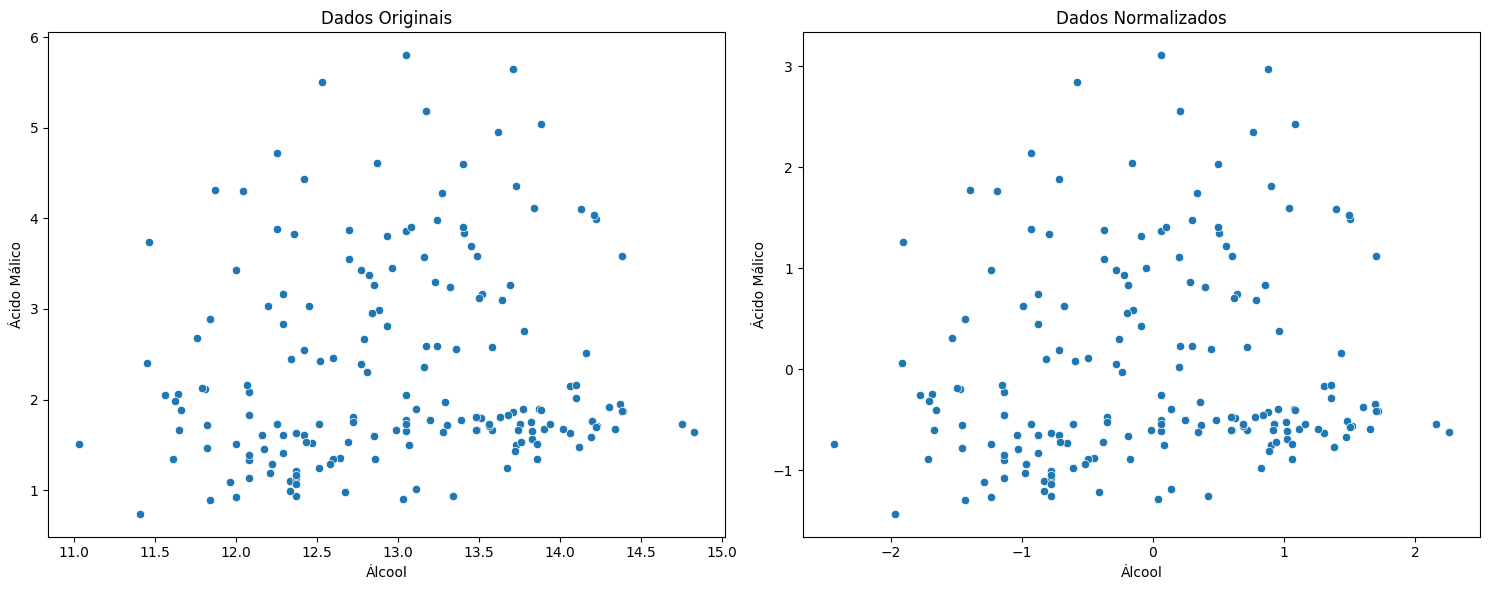

In [12]:
# Configurar subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Dados originais
sns.scatterplot(data=wine_df, x='alcohol', y='malic_acid', ax=axes[0])
axes[0].set_title('Dados Originais')
axes[0].set_xlabel('Álcool')
axes[0].set_ylabel('Ácido Málico')

# Dados normalizados
sns.scatterplot(data=wines_scaled, x='alcohol', y='malic_acid', ax=axes[1])
axes[1].set_title('Dados Normalizados')
axes[1].set_xlabel('Álcool')
axes[1].set_ylabel('Ácido Málico')

plt.tight_layout()
plt.show()

Como podemos ver, os pontos nos dados padronizados são iguais aos originais. A única coisa que muda é a escala dos eixos.

### Aplicação do K-Means

Com os dados devidamente tratados, podemos executar o algoritmo k-means e analisar os principais componentes que a função retorna.


In [13]:
# Executar k-means com k=2
kmeans = KMeans(n_clusters=2, random_state=0)
wines_k2 = kmeans.fit_predict(wines_scaled)


Podemos acessar como cada ponto de dado foi agrupado. Nesse caso, foram atribuídos valores de 0 e 1 (2 clusters).

In [14]:
# Atribuições de cluster para cada ponto
cluster_labels = kmeans.labels_

# Exibir atribuições de cluster
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [15]:
print(len(cluster_labels))

178


Os centróides dos clusters podem ser acessados pelo comando abaixo.

In [16]:
# Centros dos clusters
cluster_centers = kmeans.cluster_centers_
# Exibir centros dos clusters
print(cluster_centers)

[[ 0.04197899 -0.38224053 -0.10922044 -0.29717226  0.08897972  0.5428402
   0.60204711 -0.48200615  0.41194796 -0.31261472  0.50738654  0.61509448
   0.26067933]
 [-0.07297886  0.66451047  0.18987553  0.51662255 -0.15468782 -0.94370681
  -1.04663574  0.83794915 -0.71615568  0.54346866 -0.88207198 -1.06931809
  -0.45318098]]


In [17]:
# Ver os centróides na escala original dos dados 
cluster_centers_orig = scaler.inverse_transform(cluster_centers)
cluster_centers_orig

array([[1.30346018e+01, 1.91053097e+00, 2.33663717e+00, 1.85053097e+01,
        1.01008850e+02, 2.63389381e+00, 2.62893805e+00, 3.02035398e-01,
        1.82601770e+00, 4.33539823e+00, 1.07309735e+00, 3.04716814e+00,
        8.28752212e+02],
       [1.29415385e+01, 3.07661538e+00, 2.41846154e+00, 2.12153846e+01,
        9.75384615e+01, 1.70615385e+00, 9.86769231e-01, 4.65846154e-01,
        1.18215385e+00, 6.31446152e+00, 7.56400000e-01, 1.85461538e+00,
        6.04584615e+02]])

Podemos ver que o cluster 0 é bem maior do que o 1.

In [18]:
# Calcular tamanhos dos clusters
cluster_sizes = np.bincount(cluster_labels)

# Exibir tamanhos dos clusters
print(cluster_sizes)


[113  65]


Podemos explorar ainda mais as características dos clusters gerados, como por exemplo, medir a compactação e dissimilaridade entre os clusters. 


Podemos fazer isso calculando algumas medidas, por exemplo:
- **Soma dos Quadrados Intra-Cluster (SSW ou WSS):** É a soma das distâncias quadradas entre cada ponto de dados e o centróide do cluster ao qual pertence. Esta métrica ajuda a avaliar quão compactos são os clusters formados pelo K-means. Nesse caso, quanto menor o valor, melhor. 
- **Soma dos Quadrados Entre-Cluster (SSB):** Representa a soma das distâncias quadradas entre os centróides dos clusters e a média global de todos os pontos de dados. Esta medida avalia quão bem separados estão os diferentes clusters uns dos outros. Aqui, quanto maior o valor, melhor. 
- **Soma Total dos Quadrados (TSS):** É a soma total das distâncias quadradas de todos os pontos de dados em relação à média global. Matematicamente, pode ser expressa como a soma de SSW e SSB.


Vamos calcular cada uma delas.

In [19]:
# Calcular a soma dos quadrados dentro dos clusters (WSS)
wss = kmeans.inertia_
print('WSS:', wss)

WSS: 1659.0079672511501


In [20]:
# Calcular a soma dos quadrados entre os clusters (BSS)

# Calculando a média global dos dados
global_mean = np.mean(wines_scaled, axis=0)

# Calculando a Soma dos Quadrados Entre-Cluster (SSB)
SSB = 0
for i in range(kmeans.n_clusters):
    # Número de pontos no cluster i
    n_points = np.sum(cluster_labels == i)
    # Distância ao quadrado entre o centroide do cluster e a média global
    cluster_mean = kmeans.cluster_centers_[i]
    distance = np.linalg.norm(cluster_mean - global_mean)
    SSB += n_points * (distance ** 2)

print("SSB:", SSB)

SSB: 654.9920327488501


In [21]:
# Calcular a soma total dos quadrados (TSS)
global_mean  = np.mean(wines_scaled, axis=0)
tss = np.sum(np.linalg.norm(wines_scaled - global_mean , axis=1)**2)
print('TSS:', tss)

TSS: 2314.0


É claro que, tendo três valores que se relacionam, você só precisa calcular dois, o terceiro sai naturalmente.

In [22]:
# Calcular a soma dos quadrados entre os clusters (BSS)
bss = tss - wss

# Exibir a soma dos quadrados entre os clusters
print("SSB:", SSB)

SSB: 654.9920327488501


Essas medidas são importantes caso se esteja testando diferentes configurações para um dado algoritmo ou menos para a comparação entre diferentes algoritmos. 

### Definir a quantidade ideal de clusters 
Existem diversas formas para definir a quantidade ideal de clusters. Para nosso problema vamos começar pela análise gráfica do método do cotovelo. Podemos fazer isso fazendo um gráfico de WSS vs k. 


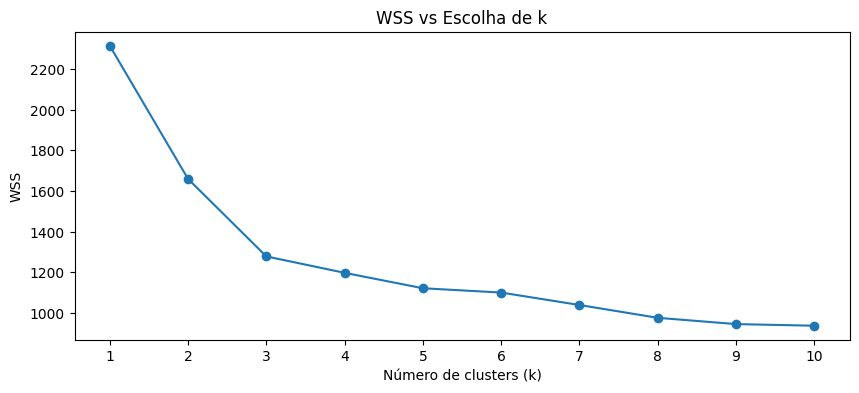

In [23]:
# Inicializar a lista para armazenar valores de wss
wss = []

# Definir semente para reprodutibilidade
np.random.seed(0)

# Executar o algoritmo para diferentes valores de k
range_clusters = range(1, 11)
for i in range_clusters:
    # Executar k-means com o valor atual de k
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(wines_scaled)
    
    # Calcular wss
    wss.append(kmeans.inertia_)


# Soma total dos quadrados dentro dos clusters vs Escolha de k
plt.figure(figsize=(10, 4))
plt.plot(range_clusters, wss, marker='o', linestyle='-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WSS')
plt.title('WSS vs Escolha de k')
plt.xticks(range_clusters)
plt.show()


Vemos que o valor de WSS cai significantemente até k=3. Após isso o aumento do número de clusters não proporciona diminuição significativa nos valores de WSS, sendo portanto, 3 clusters a quantidade ideal. É interessante comparar isso com o total de labels no banco de dados original, que são justamente 3!

Uma outra opção seria usar a métrica Silhouette Score, medindo seu valor para diferentes valores de k. Quanto maior, melhor.

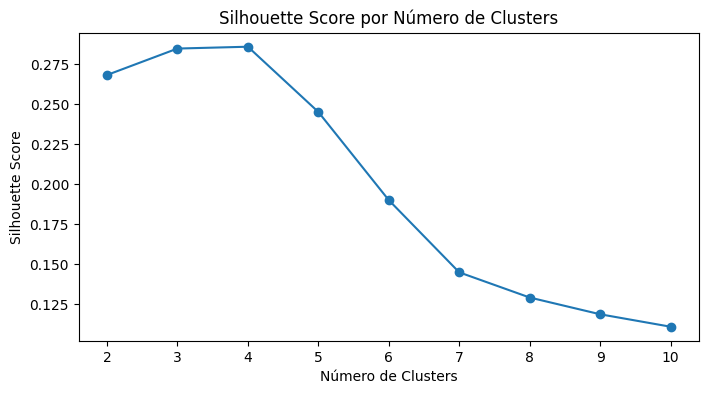

In [24]:
silhouette_scores = []

range_clusters = range(2, 11)
for i in range_clusters:
    kmeans = KMeans(n_clusters=i, random_state=0)
    labels = kmeans.fit_predict(wines_scaled)
    
    score = silhouette_score(wines_scaled, labels)
    silhouette_scores.append(score)
    
plt.figure(figsize=(8, 4))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por Número de Clusters')
plt.show()

Para essa métrica, os melhores valores são k igual a 3 ou 4.

Podemos ainda medir a métrica Davies-Bouldin Index (DBI) para diferentes números de clusters. Quanto menor, melhor.

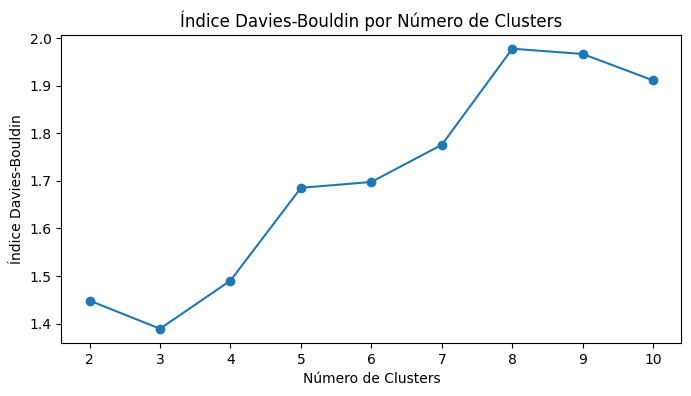

In [25]:
davies_bouldin_scores = []

for i in range_clusters:
    kmeans = KMeans(n_clusters=i, random_state=0)
    labels = kmeans.fit_predict(wines_scaled)
    score = davies_bouldin_score(wines_scaled, labels)
    davies_bouldin_scores.append(score)

# Plotando o Índice Davies-Bouldin por número de clusters
plt.figure(figsize=(8, 4))
plt.plot(range_clusters, davies_bouldin_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice Davies-Bouldin')
plt.title('Índice Davies-Bouldin por Número de Clusters')
plt.show()


Mais uma vez confirmamos k=3 como a melhor opção. 

### 7 Resultado final

Vamos então, atualizar a quantidade de clusters e refazer o processo. 


In [26]:
# Executar k-means com k=3
kmeans_k3 = KMeans(n_clusters=3, random_state=0)
wines_k3 = kmeans_k3.fit_predict(wines_scaled)

Podemos consolidar os resultados para possibilitar uma melhor interpretação.

In [27]:
# Concatenar características originais e rótulos de cluster
wines_with_cluster = wine_df.copy()
wines_with_cluster['cluster'] = wines_k3
wines_with_cluster

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  cluster  
0                            3.92   1065.0        2  
1                            3.40   1050.0        2  
2                            3.17   1185.0        2  
3                            3.45   1480.0        2  
4                            2.93    735.0        2  
..                            ...      ...      ...  
173                          1.74    740.0        1  
174                          1.56    750.0        1  
175                          1.56    835.0        1  
176                          1.62    840.0        1  
177                          1.60    560.0        1  

[178 rows x 14 columns]

In [28]:
# Valores médios de cada cluster
cluster_means = wines_with_cluster.groupby('cluster').mean()
cluster_means

alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
cluster                                                                   
0        12.250923    1.897385  2.231231          20.063077   92.738462   
1        13.134118    3.307255  2.417647          21.241176   98.666667   
2        13.676774    1.997903  2.466290          17.462903  107.967742   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  
cluster                                                                        
0               2.973077  1.062708                      2.803385   510.169231  
1               7.234706  0.691961                      1.696667   619.058824  
2               5.453548  1.065484                      3.163387  1100.225806

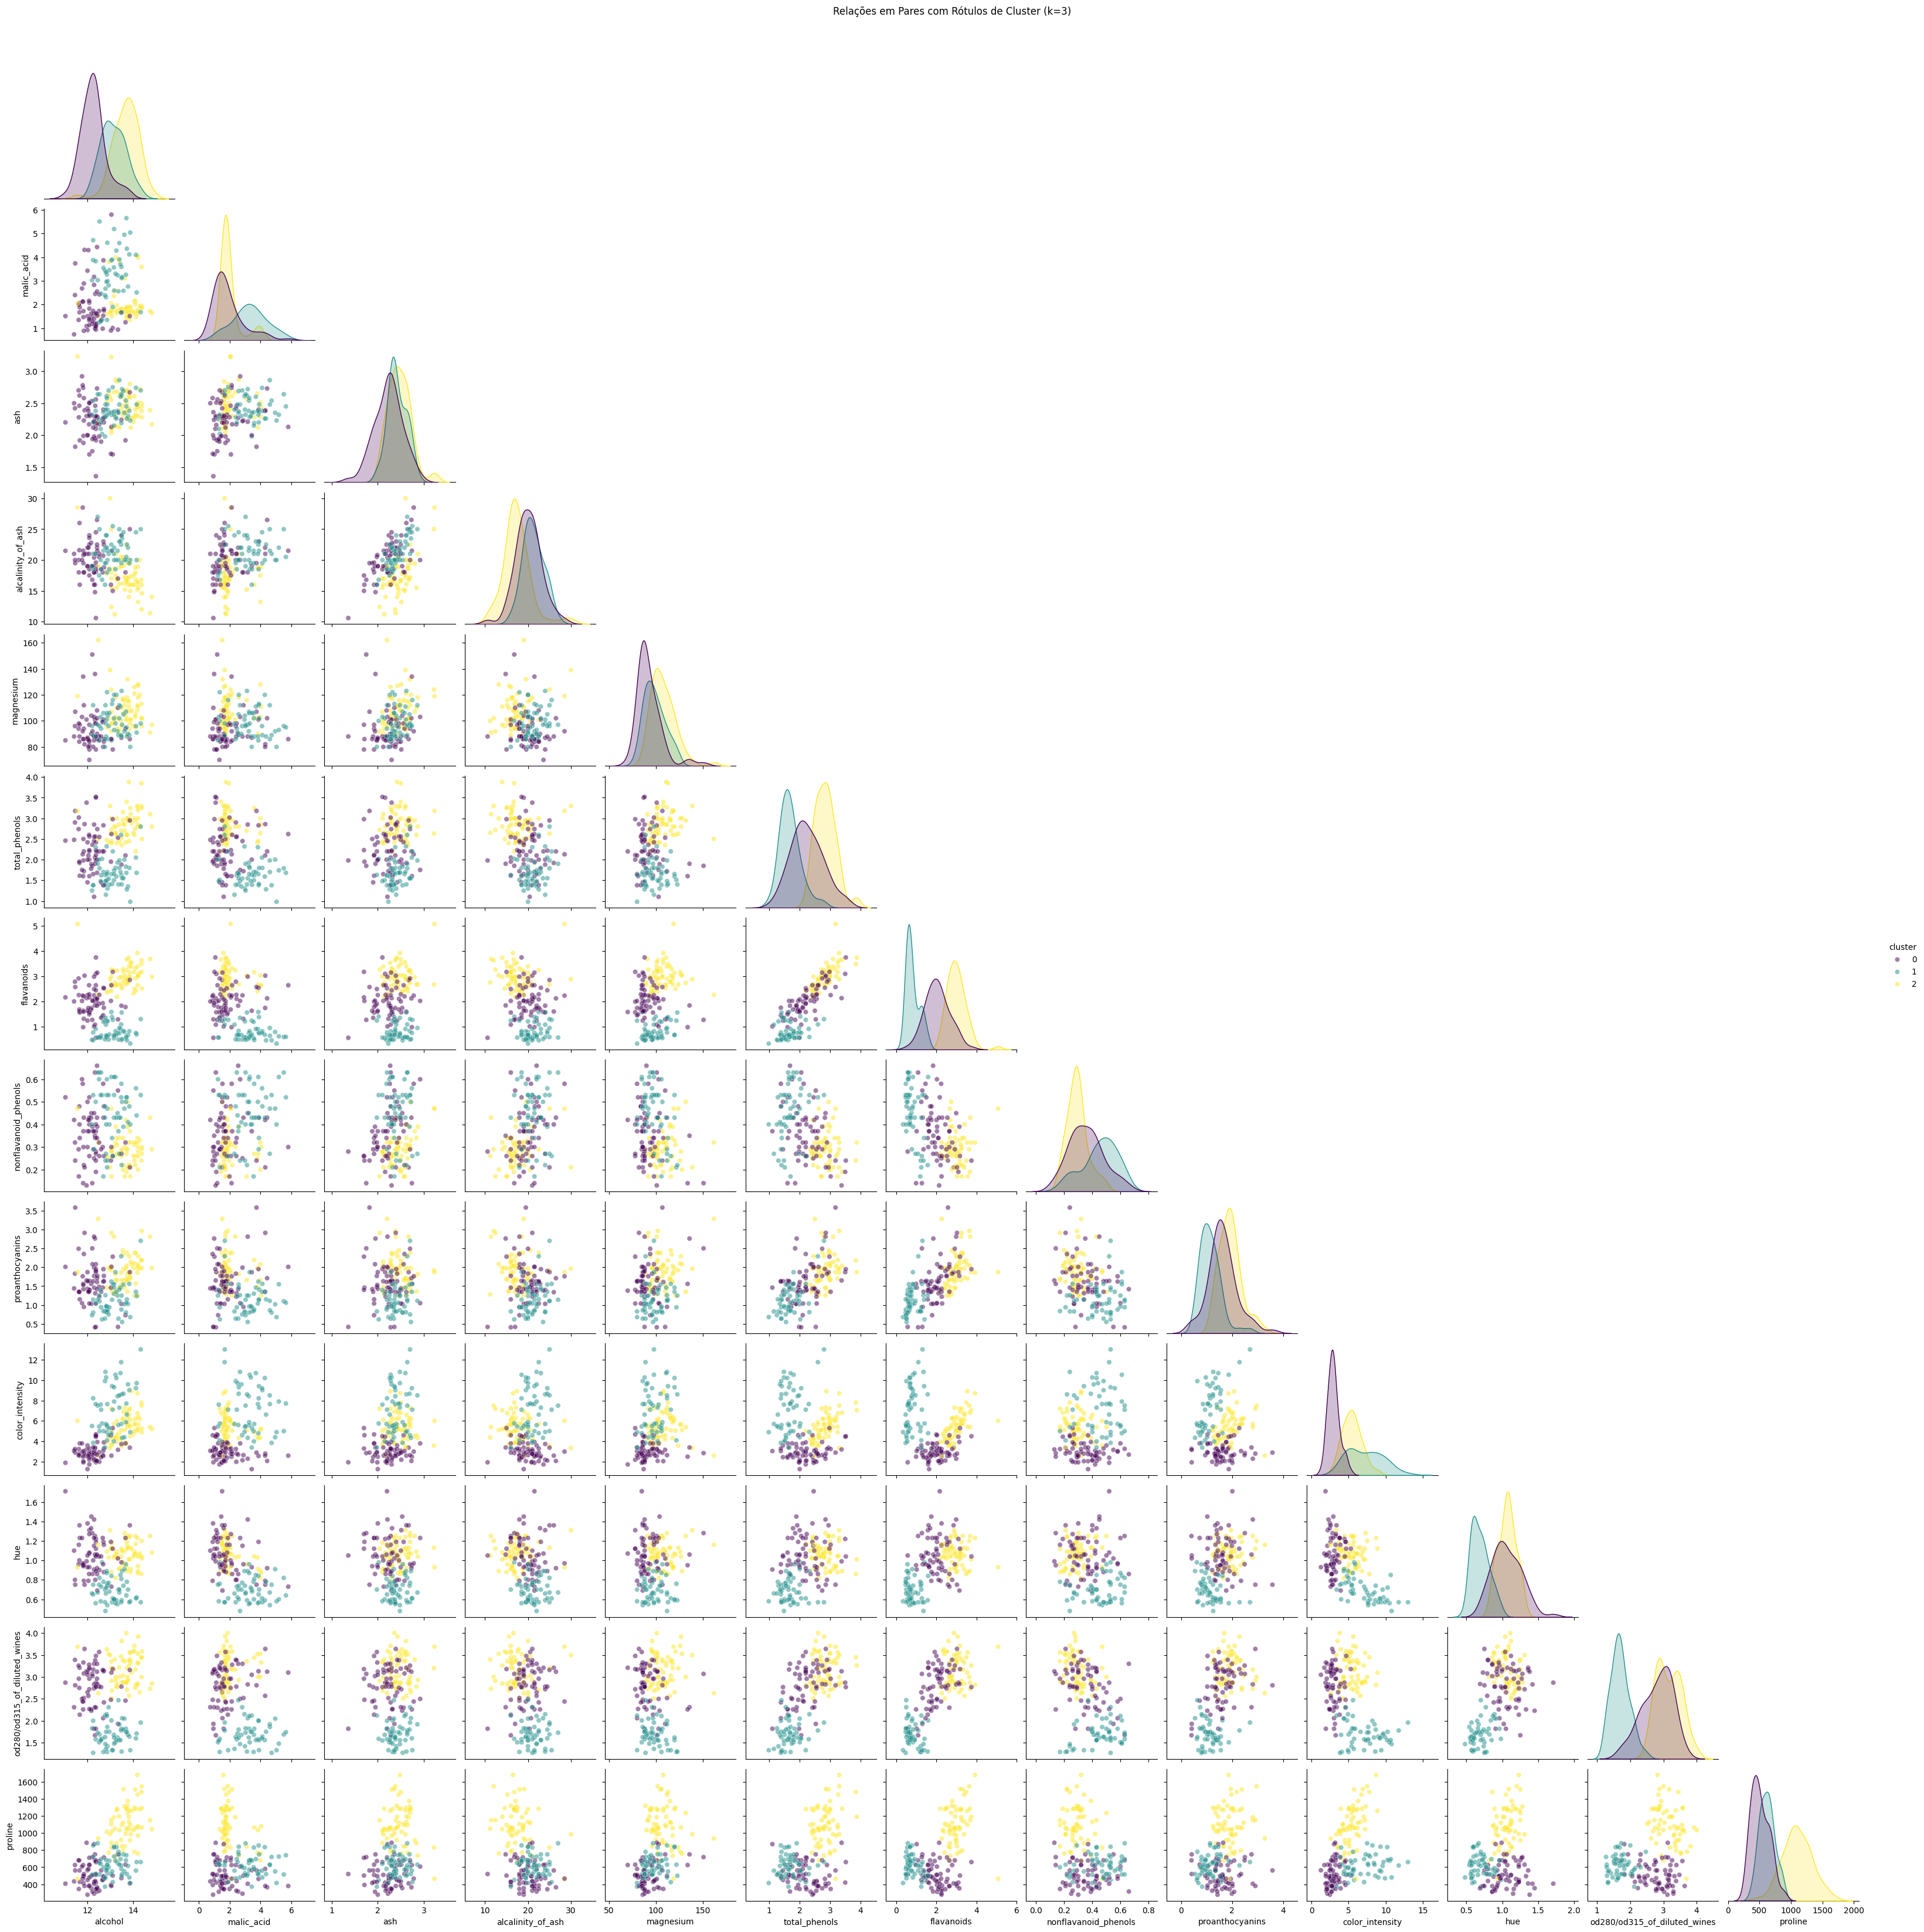

In [29]:
# Visualizar o resultado do agrupamento apenas com a metade superior da matriz
sns.pairplot(wines_with_cluster, vars=wines_with_cluster.columns[:-1], hue='cluster', palette='viridis', 
             diag_kind='kde', plot_kws={'alpha': 0.5}, corner='upper')
plt.suptitle('Relações em Pares com Rótulos de Cluster (k=3)', y=1.02)
plt.show()


A grande quantidade de features dificulta muito a visualização. Vamos tentar observar nos dataframes gerados e escolher as variáveis que representam as maiores variações entre os clusters, como: malic_acid, total_phenols, flavanoids, color_intensity, hue, od280/od315_of_diluted_wines, proline.

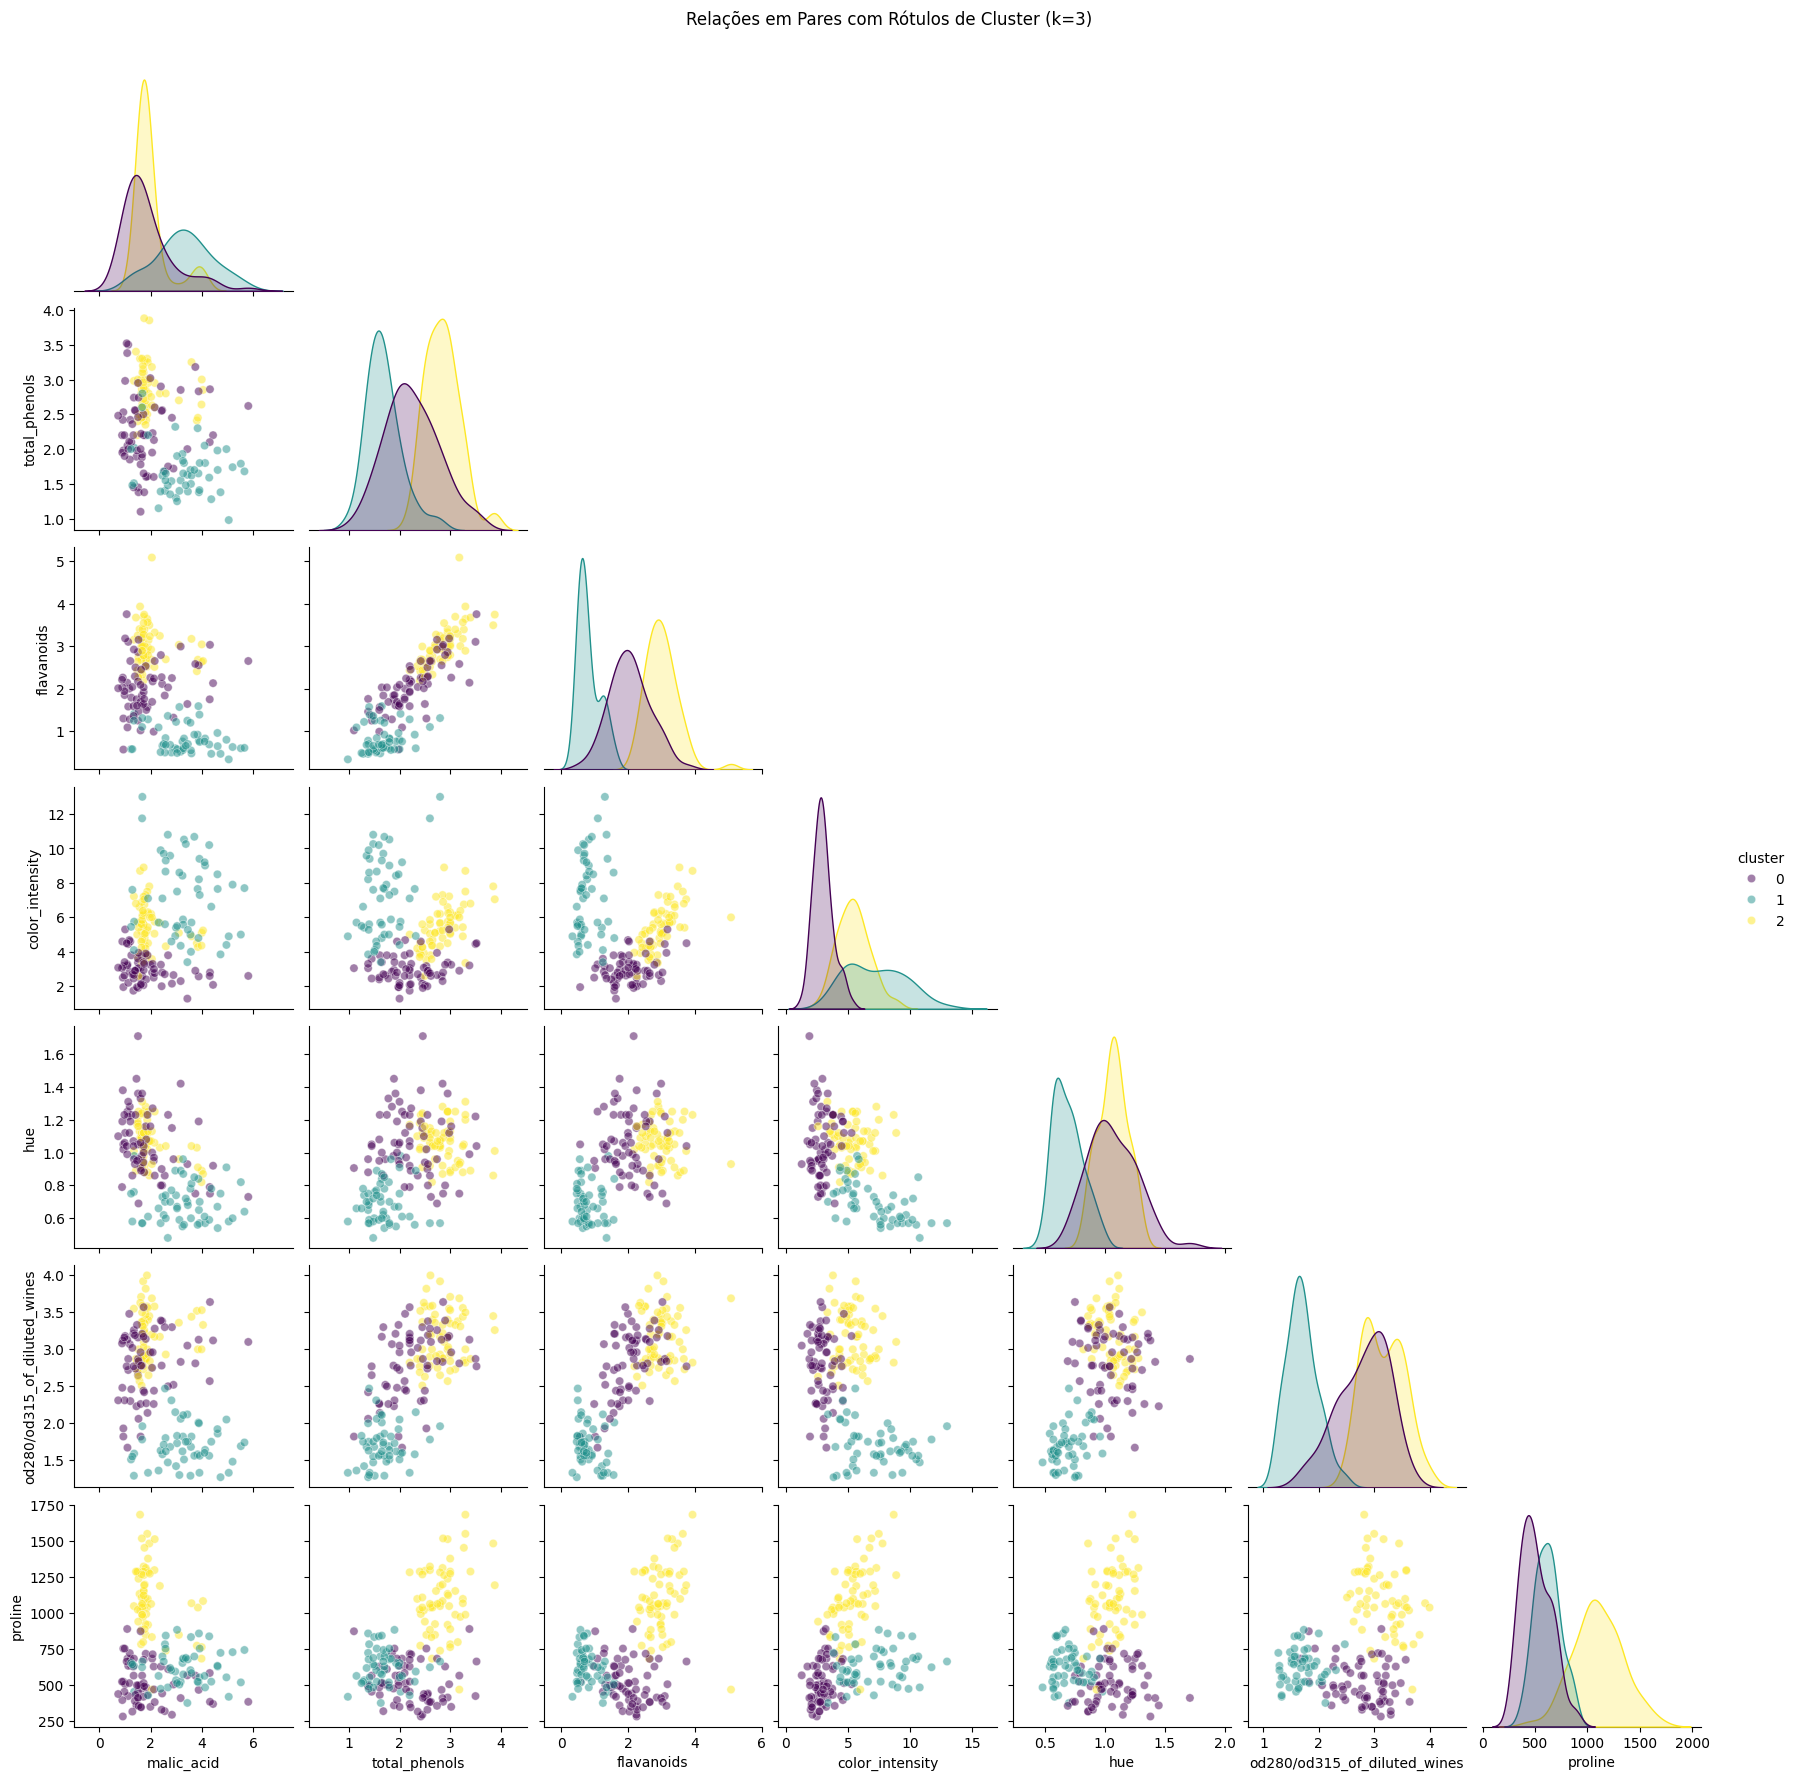

In [30]:
cols = ['malic_acid', 'total_phenols', 'flavanoids', 'color_intensity', 'hue',
        'od280/od315_of_diluted_wines', 'proline']

sns.pairplot(wines_with_cluster, vars=cols, hue='cluster', palette='viridis', 
             diag_kind='kde', plot_kws={'alpha': 0.5}, corner='upper')
plt.suptitle('Relações em Pares com Rótulos de Cluster (k=3)', y=1.02)
plt.show()

Bem melhor.

### PCA e visualização

Vimos como fica boa a visualização dos pares de features na clusterização. Uma outra alternativa seria aplicar 
A Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados originais, por exemplo de 13 para duas dimensões, e assim visualizar a qualidade da clusterização como um todo.

OBS: A PCA pode ser utilizada antes de aplicar um algoritmo de clusterização. Nesse caso, o agrupamento se dá nos dados resultantes da PCA. Isso ajuda a melhorar a performance da clusterização, principalmente para dados de alta dimensão. 

In [31]:
# Aplicar PCA
pca = PCA(n_components=2)
wines_pca = pca.fit_transform(wines_scaled)
wines_pca[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [32]:

# Concatenar os componentes do PCA e os rótulos de cluster
wines_pca_df = pd.DataFrame(data=wines_pca, columns=['PC1', 'PC2'])
wines_pca_df['cluster'] = wines_k3

wines_pca_df.head()


PC1       PC2  cluster
0  3.316751 -1.443463        2
1  2.209465  0.333393        2
2  2.516740 -1.031151        2
3  3.757066 -2.756372        2
4  1.008908 -0.869831        2

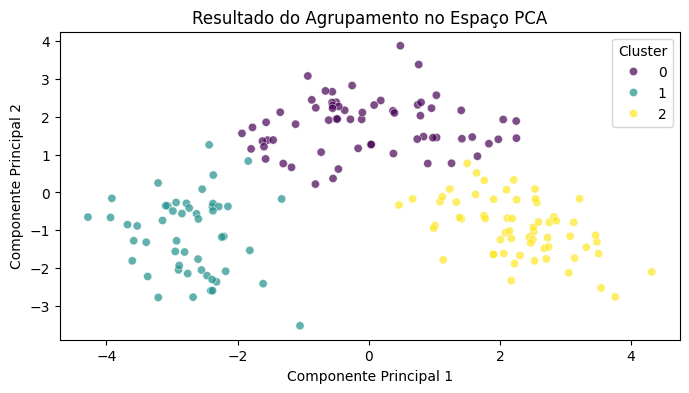

In [33]:
# Visualizar o resultado do agrupamento no espaço PCA
plt.figure(figsize=(8, 4))
sns.scatterplot(data=wines_pca_df, x='PC1', y='PC2', hue='cluster', palette='viridis', alpha=0.7)
plt.title('Resultado do Agrupamento no Espaço PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()